# Statistik Labor Aufgabe 2

## Importe und Optionen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 200)

## Funktionen

In [2]:
def readData(file):
    df = pd.read_csv(file, sep="\s+", 
                    header=None, 
                    names=["jahr","anzahl"],
                    decimal=",",
                    na_values='.',
                    encoding='latin-1')
    return df

## Code

### Daten einlesen

In [3]:
data = readData('sr_aufg_2_35.txt')


### Regressionen durchführen

In [4]:
X = data['jahr'].to_numpy().reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, data['anzahl'])
r2 = linear_regressor.score(X, data['anzahl'])

# Degree 2
deg_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
poly_regressor_2 = LinearRegression()
poly_regressor_2.fit(deg_2, data['anzahl'])
r2_2 = poly_regressor_2.score(deg_2, data['anzahl'])


# Degree 3
deg_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
poly_regressor_3 = LinearRegression()
poly_regressor_3.fit(deg_3, data['anzahl'])
r2_3 = poly_regressor_3.score(deg_3, data['anzahl'])

# Degree 4
deg_4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(X)
poly_regressor_4 = LinearRegression()
poly_regressor_4.fit(deg_4, data['anzahl'])
r2_4 = poly_regressor_4.score(deg_4, data['anzahl'])

# Degree 5
deg_5 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(X)
poly_regressor_5 = LinearRegression()
poly_regressor_5.fit(deg_5, data['anzahl'])
r2_5 = poly_regressor_5.score(deg_5, data['anzahl'])

# Degree 6
deg_6 = PolynomialFeatures(degree=6, include_bias=False).fit_transform(X)
poly_regressor_6 = LinearRegression()
poly_regressor_6.fit(deg_6, data['anzahl'])
r2_6 = poly_regressor_6.score(deg_6, data['anzahl'])

# exponential
# def exponential(x, a, b):
#     return a * np.exp(b * x)
# val = data['jahr']-np.mean(data['jahr'])/np.std(data['jahr'])
# coef_exp, cov_exp = curve_fit(exponential, val, data['anzahl'])
# r2_exp = exponential(val, *coef_exp)

# res = data['anzahl'] - r2_exp
# squared_sum = np.sum(res**2)
# squared_sum_total = np.sum((data['anzahl']-np.mean(data['anzahl']))**2)
# R_squared = 1 - squared_sum/squared_sum_total

# logarithm
def logarithm(x, a, b):
    return a * np.log(x) - b
val = data['jahr']-np.mean(data['jahr'])/np.std(data['jahr'])
coef_log, cov_log = curve_fit(logarithm, val, data['anzahl'])
r2_log = logarithm(val, *coef_log)

res = data['anzahl'] - r2_log
squared_sum_log = np.sum(res**2)
squared_sum_total_log = np.sum((data['anzahl']-np.mean(data['anzahl']))**2)
R_squared_log = 1 - squared_sum_log/squared_sum_total_log



### Bevölkerungsentwicklung ausgeben

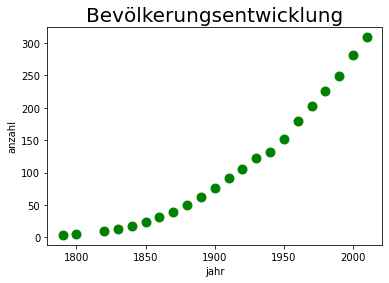

In [5]:
# Streudiagramm
scatter = data.plot.scatter(x='jahr', y='anzahl', s=80 , color='green')
scatter=plt.title(fontdict={'fontsize': 20}, label="Bevölkerungsentwicklung")

### Tabelle erstellen

In [6]:
# Create Table Strings
linear = {
    0: '$a_1$ = %.2f, $a_0$ = %.2f' % (linear_regressor.coef_, linear_regressor.intercept_),
    1: r2
}
poly_2 = {
    0: '$a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' % (poly_regressor_2.coef_[1], 
                                                    poly_regressor_2.coef_[0], 
                                                    poly_regressor_2.intercept_),
    1: r2_2
}
poly_3 = {
    0: '$a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' % (poly_regressor_3.coef_[2],
                                                                    poly_regressor_3.coef_[1],
                                                                    poly_regressor_3.coef_[0],
                                                                    poly_regressor_3.intercept_),
    1: r2_3
}
poly_4 = {
    0: '$a_4$ = %.2f, $a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' % (poly_regressor_4.coef_[3],
                                                                                    poly_regressor_4.coef_[2],
                                                                                    poly_regressor_4.coef_[1],
                                                                                    poly_regressor_4.coef_[0],
                                                                                    poly_regressor_4.intercept_),
    1: r2_4
}
poly_5 = {
    0: '$a_5$ = %.2f, $a_4$ = %.2f, $a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f' 
    % (poly_regressor_5.coef_[4],
         poly_regressor_5.coef_[3],
            poly_regressor_5.coef_[2],
            poly_regressor_5.coef_[1],
            poly_regressor_5.coef_[0],
            poly_regressor_5.intercept_),
    1: r2_5
}
poly_6 = {
    0: '$a_6$ = %.2f, $a_5$ = %.2f, $a_4$ = %.2f, $a_3$ = %.2f, $a_2$ = %.2f, $a_1$ = %.2f, $a_0$ = %.2f'
    % (poly_regressor_6.coef_[5],
            poly_regressor_6.coef_[4],
            poly_regressor_6.coef_[3],
            poly_regressor_6.coef_[2],
            poly_regressor_6.coef_[1],
            poly_regressor_6.coef_[0],
            poly_regressor_6.intercept_),
    1: r2_6
}
exponential = {
    0: 'Findet keine passenden Parameter',
    1: '-'
}
ln = {
    0: '$a$ = %.2f, $b$ = %.2f' % (coef_log[0], coef_log[1]),
    1: R_squared_log
}

dat = [
    linear.values(),
    poly_2.values(),
    poly_3.values(),
    poly_4.values(),
    poly_5.values(),
    poly_6.values(),
    exponential.values(),
    ln.values()
]
dataf = pd.DataFrame(dat,
        columns=['Koefizienten', 'Bestimmtheitsmaß'],
        index=['Linear', 'Polynom 2', 'Polynom 3', 
                'Polynom 4', 'Polynom 5', 'Polynom 6', 
                'Exponentialfunktion', 'Logarithmusfunktion'])

### Tabelle ausgeben

In [64]:
print(dataf)

                                                                                                                 Koefizienten  \
Linear                                                                                         $a_1$ = 1.39, $a_0$ = -2530.72   
Polynom 2                                                                      $a_2$ = 0.01, $a_1$ = -24.32, $a_0$ = 21881.29   
Polynom 3                                                       $a_3$ = 0.00, $a_2$ = -0.03, $a_1$ = 40.99, $a_0$ = -19421.19   
Polynom 4                                      $a_4$ = 0.00, $a_3$ = -0.00, $a_2$ = 1.25, $a_1$ = -1572.09, $a_0$ = 745564.73   
Polynom 5                          $a_5$ = 0.00, $a_4$ = -0.00, $a_3$ = 0.00, $a_2$ = -0.41, $a_1$ = -0.00, $a_0$ = 148906.35   
Polynom 6            $a_6$ = 0.00, $a_5$ = -0.00, $a_4$ = 0.00, $a_3$ = -0.00, $a_2$ = -0.00, $a_1$ = -0.00, $a_0$ = 50641.03   
Exponentialfunktion                                                                          Find

### Regressionskurve zeichnen

#### Wahl der passenden Kurve

Ich habe mich für das Polynom mit dem Grad 2 entschieden, da alle Bestimmtheitsmaße, bis auf die der Logarithmusfunktion und der linearen Kurve, ungefähr gleich sind und das Polynom mit dem Grad zwei die geringste Anzahl an Koeffizienten hat. 
Außerdem stimmt die Prognose, der Quadratischen funktion, mit den Testergegnissen überein.

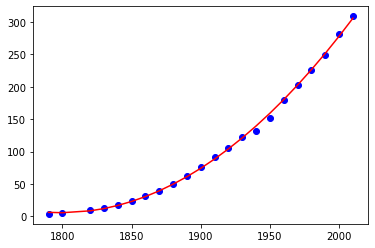

In [8]:
deg_2_pred = poly_regressor_2.predict(deg_2)
plt.scatter(data['jahr'], data['anzahl'], color='blue')
plt.plot(X, deg_2_pred, color='red')
plt.show()



### Prognose durchführen

In [9]:
def calculate_2020_poly_2(x, a, b, c):
    return a * x**2 + b * x + c


# polynomial 2
poly_2_2020 = calculate_2020_poly_2(2020, poly_regressor_2.coef_[1], poly_regressor_2.coef_[0], poly_regressor_2.intercept_)
print(poly_2_2020)


334.85895092496503


Die geschätzte Einwohnerzahl im Jahr 2020 beträgt 334.85 Millionen Menschen.

Ich habe die geschätzten koeffizienten(`a,b`) und die Verschiebung auf der y-Achse(`c`) in ein Polynom 2. Grades 
$$
y(x)=ax^2+bx+c
$$
Wobei $x:="Jahr"$ und $y(x):="Einwohneranzahl"$
eingesetzt. Mit $x=2020$ ist $y(2020)$ die geschätzte Einwohnerzahl im Jahr 2020.